In this project I'm comparing 100 songs from a playlist I curate - the PopConnoisseur Playlist - with the Billboard Hot 100 using Spotify's own Track Features: danceability, key, loudness, mode, speechiness, acousticness, instrumentalness, liveness, valence, tempo. For more about what those mean:

https://developer.spotify.com/documentation/web-api/reference/tracks/get-audio-features/

In [54]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

Let's import some data into Pandas DataFrames.
pc_data is my PopConnoisseur Playlist as of June 10, 2020
bb_data is the Billboard Hot 100 as of June 10, 2020

In [55]:
bbdf = pd.read_excel('bb_data.xlsx', usecols = "B:S")
pcdf = pd.read_excel('pc_data.xlsx', usecols = "B:S")

We'll be working with the float and int values and dropping the string columns.

In [56]:
pcdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 362 entries, 0 to 361
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   danceability      362 non-null    float64
 1   energy            362 non-null    float64
 2   key               362 non-null    int64  
 3   loudness          362 non-null    float64
 4   mode              362 non-null    int64  
 5   speechiness       362 non-null    float64
 6   acousticness      362 non-null    float64
 7   instrumentalness  362 non-null    float64
 8   liveness          362 non-null    float64
 9   valence           362 non-null    float64
 10  tempo             362 non-null    float64
 11  type              362 non-null    object 
 12  id                362 non-null    object 
 13  uri               362 non-null    object 
 14  track_href        362 non-null    object 
 15  analysis_url      362 non-null    object 
 16  duration_ms       362 non-null    int64  
 1

In [57]:
pcdf.head()

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,type,id,uri,track_href,analysis_url,duration_ms,time_signature
0,0.462,0.715,11,-6.829,1,0.0454,0.11800,0.001030,0.0592,0.237,99.763,audio_features,6D4fpmCAzPMivhDQV1y2rH,spotify:track:6D4fpmCAzPMivhDQV1y2rH,https://api.spotify.com/v1/tracks/6D4fpmCAzPMi...,https://api.spotify.com/v1/audio-analysis/6D4f...,166788,4
1,0.678,0.607,0,-7.190,1,0.0750,0.17400,0.000000,0.0788,0.445,91.973,audio_features,0sZfuG1rArPovx9CdZ40vZ,spotify:track:0sZfuG1rArPovx9CdZ40vZ,https://api.spotify.com/v1/tracks/0sZfuG1rArPo...,https://api.spotify.com/v1/audio-analysis/0sZf...,204418,4
2,0.623,0.840,7,-3.944,0,0.0799,0.04730,0.023400,0.1070,0.788,162.062,audio_features,3zzW1STuSWbyEe76XgP6kp,spotify:track:3zzW1STuSWbyEe76XgP6kp,https://api.spotify.com/v1/tracks/3zzW1STuSWby...,https://api.spotify.com/v1/audio-analysis/3zzW...,251627,3
3,0.555,0.423,0,-6.232,1,0.0440,0.79900,0.000000,0.1120,0.257,137.044,audio_features,5ZT5UB1SNVMkfYiTvnliz4,spotify:track:5ZT5UB1SNVMkfYiTvnliz4,https://api.spotify.com/v1/tracks/5ZT5UB1SNVMk...,https://api.spotify.com/v1/audio-analysis/5ZT5...,202147,4
4,0.420,0.879,11,-4.916,0,0.0568,0.00729,0.000085,0.1800,0.432,128.913,audio_features,6Q7mhgiHSay1lwwfnKzgzh,spotify:track:6Q7mhgiHSay1lwwfnKzgzh,https://api.spotify.com/v1/tracks/6Q7mhgiHSay1...,https://api.spotify.com/v1/audio-analysis/6Q7m...,279000,4


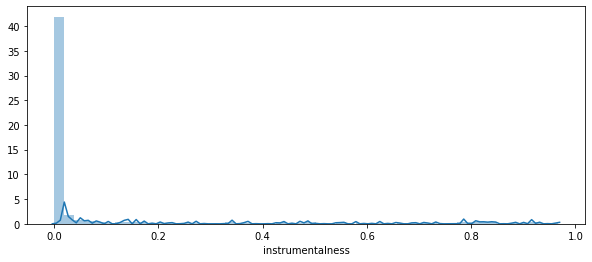

In [58]:
plt.figure(figsize=(10,4))
sns.distplot(pcdf['instrumentalness'])

Looks like there are a few instrumental-leaning songs on the PopConnoisseur Playlist.

Let's see how many different values for time signature there are.

In [59]:
pcdf.time_signature.value_counts()

4    339
3     14
5      7
1      2
Name: time_signature, dtype: int64

I don't like many songs in 5/4 time so this seems odd. Let's investigate by viewing those...

In [60]:
pcdf[pcdf.time_signature == 5]

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,type,id,uri,track_href,analysis_url,duration_ms,time_signature
18,0.586,0.6500,1,-5.912,1,0.3350,0.131000,0.000000,0.0738,0.7010,129.239,audio_features,7jhS5XE7nmgcsTbkcqzTc7,spotify:track:7jhS5XE7nmgcsTbkcqzTc7,https://api.spotify.com/v1/tracks/7jhS5XE7nmgc...,https://api.spotify.com/v1/audio-analysis/7jhS...,227173,5
22,0.294,0.0951,5,-12.915,1,0.0373,0.957000,0.000032,0.1040,0.1470,167.241,audio_features,5KmA68mgrZX815hICp1IVP,spotify:track:5KmA68mgrZX815hICp1IVP,https://api.spotify.com/v1/tracks/5KmA68mgrZX8...,https://api.spotify.com/v1/audio-analysis/5KmA...,192333,5
31,0.466,0.6660,1,-6.770,1,0.1690,0.000199,0.019500,0.0803,0.3370,113.935,audio_features,3LRddJIw2ymm1CHIO9xlkC,spotify:track:3LRddJIw2ymm1CHIO9xlkC,https://api.spotify.com/v1/tracks/3LRddJIw2ymm...,https://api.spotify.com/v1/audio-analysis/3LRd...,196117,5
35,0.344,0.4180,3,-7.811,1,0.0423,0.743000,0.000000,0.1020,0.0766,99.962,audio_features,4G9mDvbxpmMNFNXXlLbEot,spotify:track:4G9mDvbxpmMNFNXXlLbEot,https://api.spotify.com/v1/tracks/4G9mDvbxpmMN...,https://api.spotify.com/v1/audio-analysis/4G9m...,219893,5
43,0.482,0.4770,10,-8.444,0,0.0503,0.020100,0.000000,0.2510,0.3790,117.850,audio_features,0rlFL6bxIWcCn9gk9GExFA,spotify:track:0rlFL6bxIWcCn9gk9GExFA,https://api.spotify.com/v1/tracks/0rlFL6bxIWcC...,https://api.spotify.com/v1/audio-analysis/0rlF...,182834,5
247,0.122,0.5490,0,-7.389,1,0.0362,0.630000,0.015800,0.0908,0.2010,67.327,audio_features,4XmwxMblrHFWIXurJmFWD3,spotify:track:4XmwxMblrHFWIXurJmFWD3,https://api.spotify.com/v1/tracks/4XmwxMblrHFW...,https://api.spotify.com/v1/audio-analysis/4Xmw...,246787,5
315,0.544,0.9160,1,-2.742,1,0.2310,0.068700,0.000000,0.3520,0.4540,108.257,audio_features,2QZBf5Rq9bCHFt7j95G4w2,spotify:track:2QZBf5Rq9bCHFt7j95G4w2,https://api.spotify.com/v1/tracks/2QZBf5Rq9bCH...,https://api.spotify.com/v1/audio-analysis/2QZB...,212290,5


A quick listen shows all these are actually in 4/4 time so this is a case of incorrect metadata.

Let's drop the columns we don't need:

In [61]:
pcdf.drop(['key','mode','track_href','instrumentalness','analysis_url','time_signature','uri','id','type'],axis=1,inplace=True)

In [62]:
pcdf.head()

,danceability,energy,loudness,speechiness,acousticness,liveness,valence,tempo,duration_ms
0,0.462,0.715,-6.829,0.0454,0.11800,0.0592,0.237,99.763,166788
1,0.678,0.607,-7.190,0.0750,0.17400,0.0788,0.445,91.973,204418
2,0.623,0.840,-3.944,0.0799,0.04730,0.1070,0.788,162.062,251627
3,0.555,0.423,-6.232,0.0440,0.79900,0.1120,0.257,137.044,202147
4,0.420,0.879,-4.916,0.0568,0.00729,0.1800,0.432,128.913,279000


Much better.

Let's plot everything vs everything else to see if anything interesting pops out:

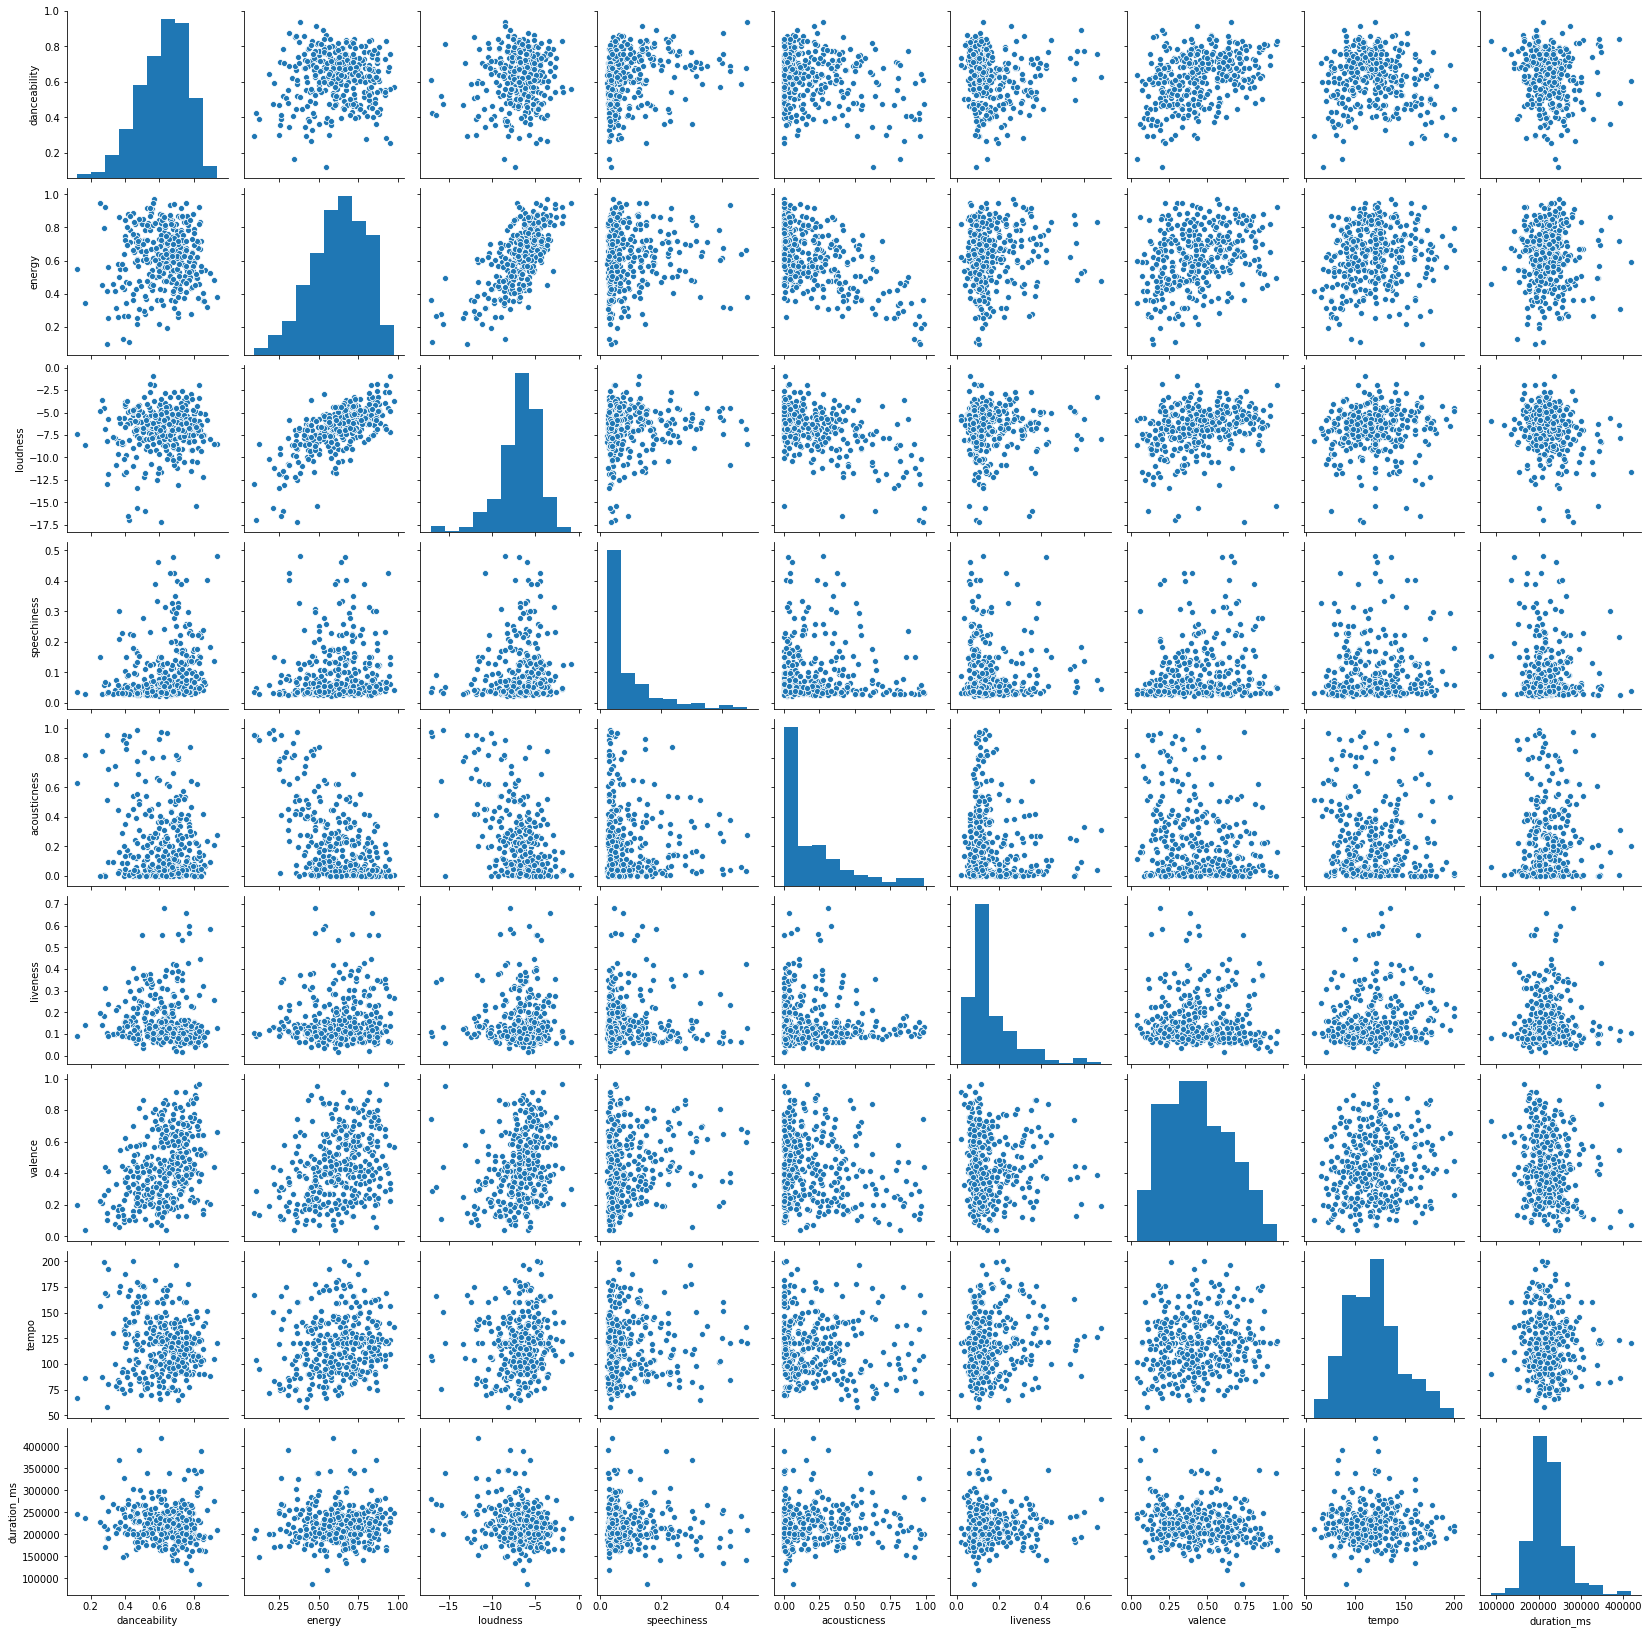

In [63]:
sns.pairplot(pcdf)

Some observations about the songs on the PopConnoisseur Playlist: 
1. fairly loud
2. not very "speechy"
3. not very "live"
4. midtempo: mostly between 90 and 140 bpm
5. mostly around the same length - 3-4 min
6. generally low-valence, which means "gloomy" or "negative"
7. some correlation between loudness and energy, which makes sense
8. slight correlation between loudness and danceability, which again makes sense

Now let's look at the Billboard Hot 100:

In [64]:
bbdf.head()

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,type,id,uri,track_href,analysis_url,duration_ms,time_signature
0,0.672,0.855,9,-3.764,1,0.0397,0.02100,0.000000,0.3230,0.646,123.056,audio_features,24ySl2hOPGCDcxBxFIqWBu,spotify:track:24ySl2hOPGCDcxBxFIqWBu,https://api.spotify.com/v1/tracks/24ySl2hOPGCD...,https://api.spotify.com/v1/audio-analysis/24yS...,182200,4
1,0.822,0.743,10,-4.772,0,0.2800,0.01600,0.000000,0.1270,0.636,84.459,audio_features,5v4GgrXPMghOnBBLmveLac,spotify:track:5v4GgrXPMghOnBBLmveLac,https://api.spotify.com/v1/tracks/5v4GgrXPMghO...,https://api.spotify.com/v1/audio-analysis/5v4G...,242001,4
2,0.746,0.690,11,-7.956,1,0.1640,0.24700,0.000000,0.1010,0.497,89.977,audio_features,7ytR5pFWmSjzHJIeQkgog4,spotify:track:7ytR5pFWmSjzHJIeQkgog4,https://api.spotify.com/v1/tracks/7ytR5pFWmSjz...,https://api.spotify.com/v1/audio-analysis/7ytR...,181733,4
3,0.514,0.730,1,-5.934,1,0.0598,0.00146,0.000095,0.0897,0.334,171.005,audio_features,0VjIjW4GlUZAMYd2vXMi3b,spotify:track:0VjIjW4GlUZAMYd2vXMi3b,https://api.spotify.com/v1/tracks/0VjIjW4GlUZA...,https://api.spotify.com/v1/audio-analysis/0VjI...,200040,4
4,0.856,0.641,11,-4.640,0,0.2040,0.11900,0.000005,0.4270,0.745,111.004,audio_features,11VApNQCWLJdzxWrlmwzUa,spotify:track:11VApNQCWLJdzxWrlmwzUa,https://api.spotify.com/v1/tracks/11VApNQCWLJd...,https://api.spotify.com/v1/audio-analysis/11VA...,206221,4


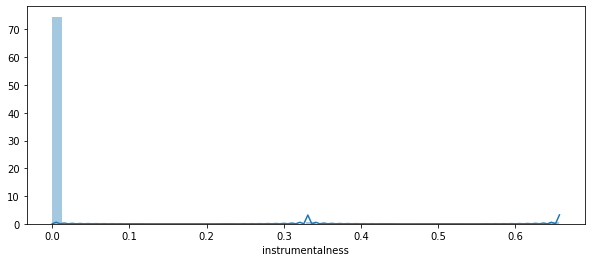

In [65]:
plt.figure(figsize=(10,4))
sns.distplot(bbdf['instrumentalness'])

There are virtually no instrumentals on the billboard Hot 100!

How many different values for time signature are there?

In [66]:
bbdf.time_signature.value_counts()

4    97
3     2
1     1
Name: time_signature, dtype: int64

Mostly 4/4 time - that sounds right. Let's drop the columns we don't need:

In [67]:
bbdf.drop(['key','mode','track_href','instrumentalness','analysis_url','time_signature','uri','id','type'],axis=1,inplace=True)

Let's check the averages:

In [68]:
pcdf.mean()

danceability         0.623856
energy               0.624329
loudness            -6.808097
speechiness          0.094267
acousticness         0.204381
liveness             0.160218
valence              0.437906
tempo              118.237229
duration_ms     222684.541436
dtype: float64

In [69]:
bbdf.mean()

danceability         0.727470
energy               0.620790
loudness            -6.537780
speechiness          0.128553
acousticness         0.193882
liveness             0.187433
valence              0.499516
tempo              120.670870
duration_ms     190449.530000
dtype: float64

Some observations:

1. Billboard Hot 100 much more danceable.
2. Energy, loudness, liveness, acousticness and tempo roughly comparable.
3. PopConnoisseur has longer songs.

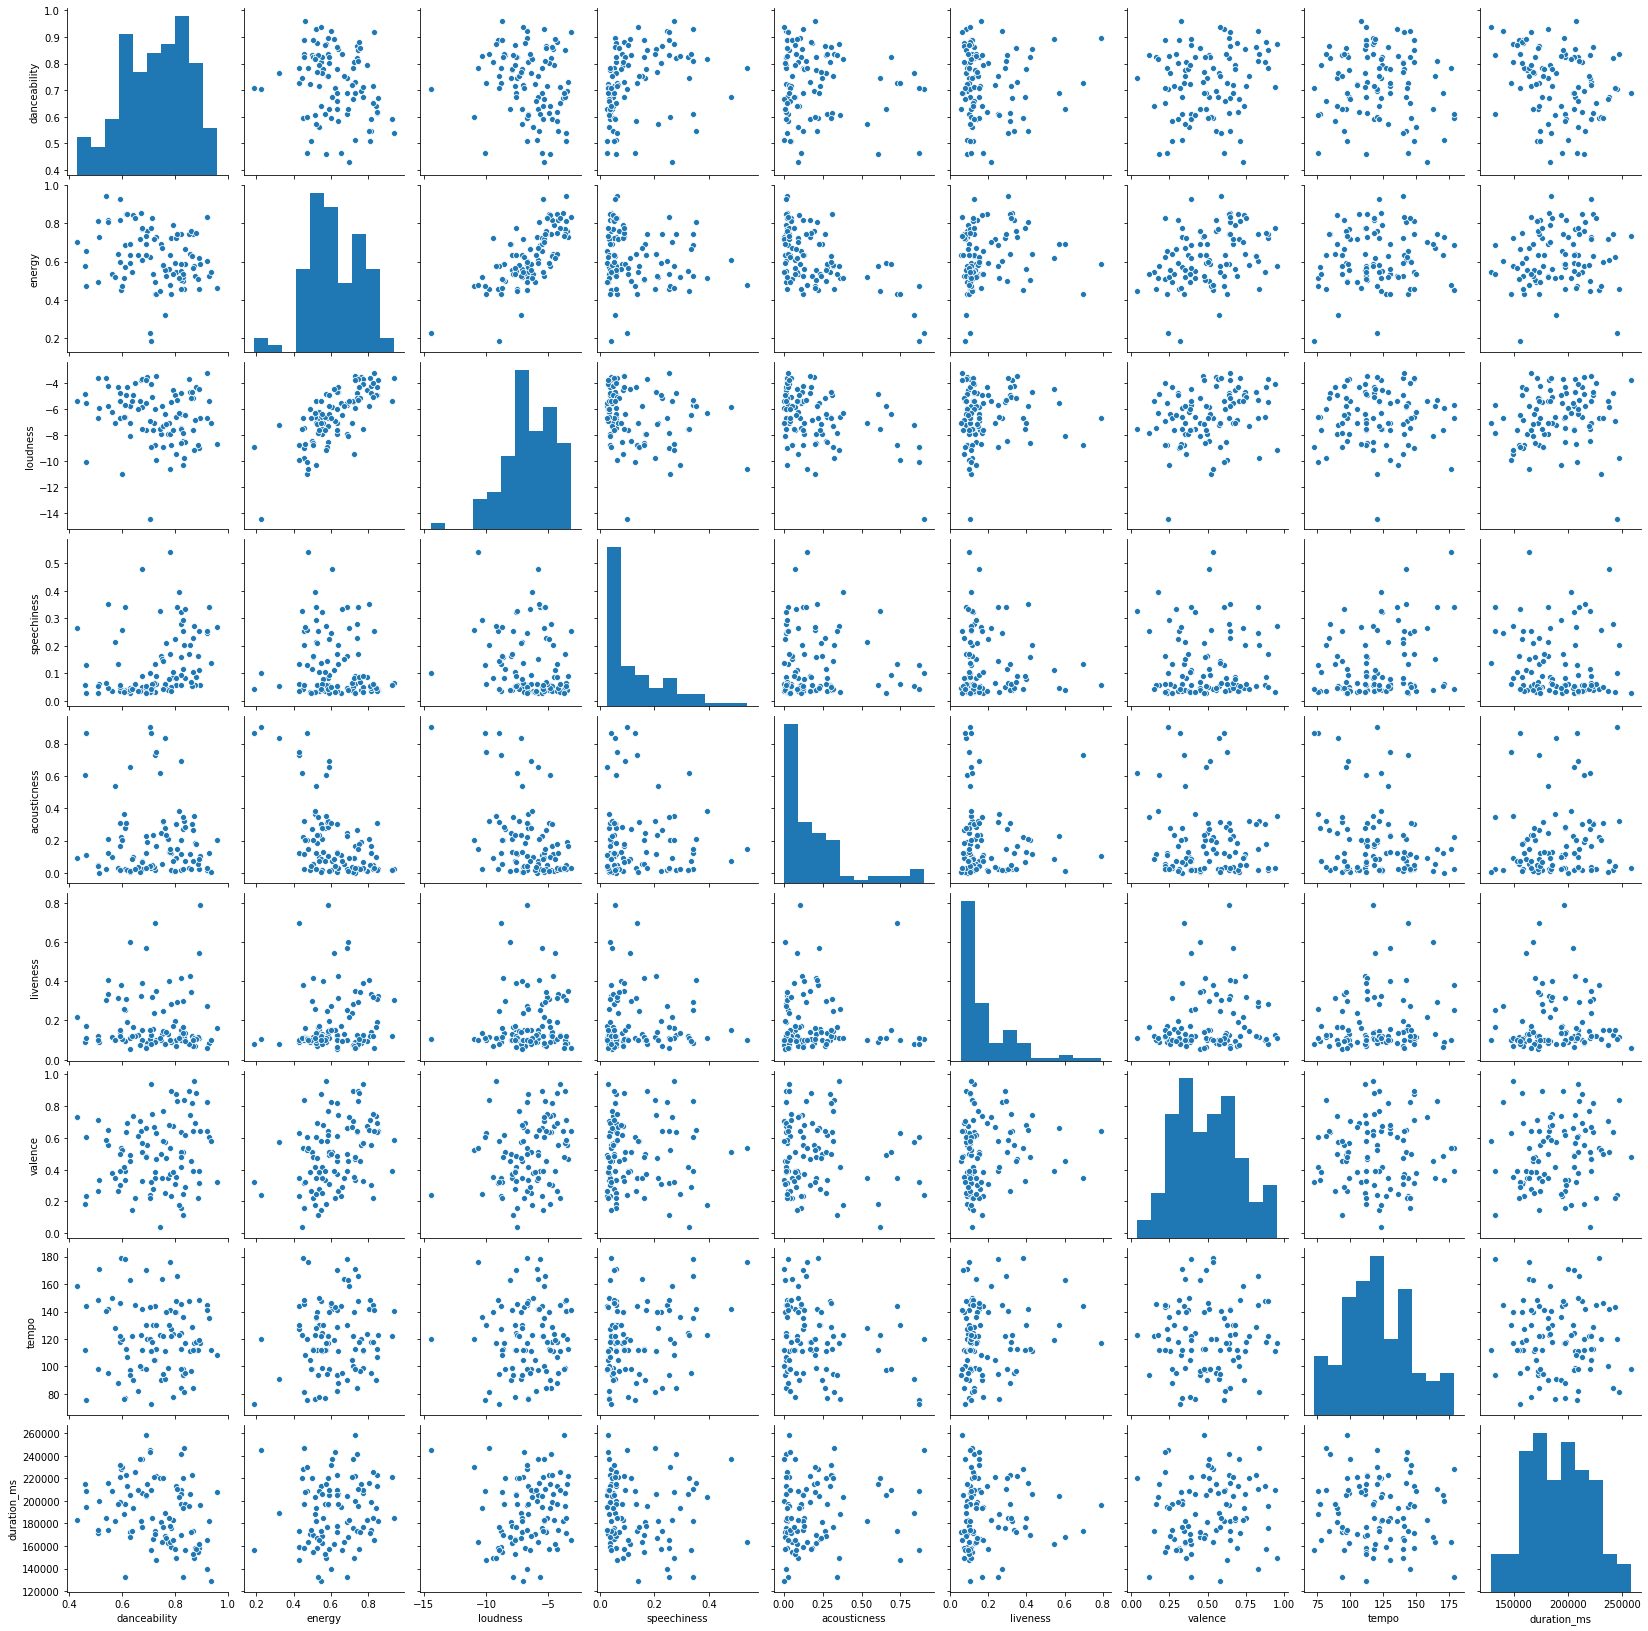

In [70]:
sns.pairplot(bbdf)

Some observations of songs on the Billboard Hot 100:
1. fairly loud
2. not very "speechy"
3. not very "live"
4. midtempo: mostly between 90 and 140 bpm
5. a wider variety of tempos than the PopConnoisseur playlist
6. valence mostly in the middle
7. again, some correlation between loudness and energy, which makes sense
8. no real correlation between energy and danceability, which is interesting...

Let's investigate energy vs danceability:

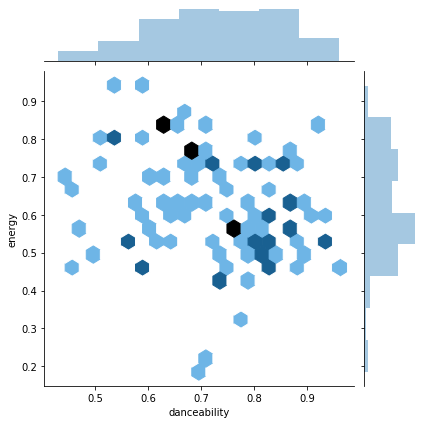

In [77]:
sns.jointplot(x="danceability", y="energy", kind="hex", gridsize=20, data=bbdf)

Can't wait to hear some of those low-energy dancefloor bangers....

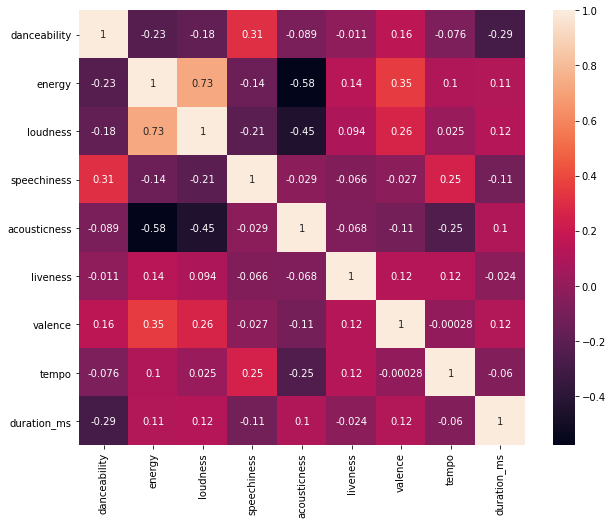

In [78]:
plt.figure(figsize=(10,8))
sns.heatmap(bbdf.corr(),annot=True)

In [79]:
import numpy as np
from sklearn.model_selection import train_test_split

Next let's use Scikit-Learn to do some machine learning analysis.

First let's double-check to make sure that all columns are numeric.

In [80]:
pcdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 362 entries, 0 to 361
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   danceability  362 non-null    float64
 1   energy        362 non-null    float64
 2   loudness      362 non-null    float64
 3   speechiness   362 non-null    float64
 4   acousticness  362 non-null    float64
 5   liveness      362 non-null    float64
 6   valence       362 non-null    float64
 7   tempo         362 non-null    float64
 8   duration_ms   362 non-null    int64  
dtypes: float64(8), int64(1)
memory usage: 25.6 KB


In [81]:
X = pcdf.drop('energy',axis=1)
y = pcdf['energy']

In [82]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [83]:
from sklearn.linear_model import LinearRegression

In [84]:
lm = LinearRegression()

In [85]:
lm.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [86]:
print(lm.intercept_)

0.8215216469341171


In [88]:
predictions = lm.predict( X_test)

Text(0, 0.5, 'Predicted Y')

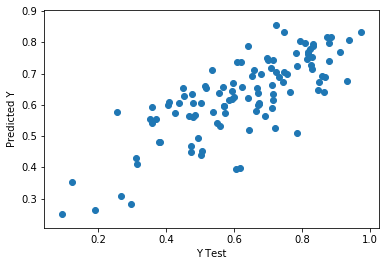

In [89]:
plt.scatter(y_test,predictions)
plt.xlabel('Y Test')
plt.ylabel('Predicted Y')

This is... not terrible. There is some correlation, which is not bad for 362 samples.

Let's check out some typical metrics: MAE, MSE and RMSE.

In [90]:
from sklearn import metrics

print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

MAE: 0.09770641449593973
MSE: 0.01441013146001022
RMSE: 0.1200422069940828


Let's see a histogram of the residuals

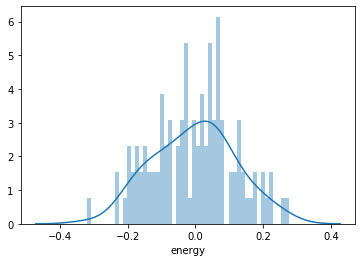

In [91]:
sns.distplot((y_test-predictions),bins=50);

There aren't many samples by the standards of these things so it looks fairly "stepped", but the overall curve is good.

In [100]:
coeffecients = pd.DataFrame(lm.coef_,X.columns)
coeffecients.columns = ['Coeffecient']
coeffecients

,Coeffecient
danceability,-1.673657e-01
loudness,3.169296e-02
speechiness,-1.253606e-01
acousticness,-2.562911e-01
liveness,7.542980e-02
valence,1.606251e-01
tempo,2.411168e-04
duration_ms,3.484753e-07


Interpreting the coefficients:

1. Holding all other features fixed, a 1 unit increase in danceability is associated with a change of -1.673657e-01 (a drop) in energy. Weird.
2. A 1 unit increase in loudness is associated with a change of 3.169296e-02 in energy. Makes sense.
3. A 1 unit increase in speechiness is associated with a change of -1.253606e-01 (a drop) in energy. This makes sense, since pure spoken word has little conventional "energy".
4. A 1 unit increase in acousticness is associated with a change of -2.562911e-01 (a drop) in energy, so acousticness "drains" energy!
5. A 1 unit increase in liveness is associated with an increase of 7.542980e-02 in energy. Makes sense.
6. A 1 unit increase in valence is associated with an increase of 1.606251e-01 in energy. Makes sense.
7. A 1 unit increase in tempo is associated with an increase of 2.411168e-04 in energy. Surprising - I would have expected a stronger relationship.
8. A 1 unit increase in duration_ms is associated with an increase of 3.484753e-07 in energy, so essentially no relationship.

Let's try the same thing again for the Billboard Hot 100:

In [33]:
X = bbdf.drop('energy',axis=1)
y = bbdf['energy']

In [34]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [36]:
lm = LinearRegression()

In [37]:
lm.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

Let's check out the coefficients:

In [46]:
lm.coef_

array([-4.19692687e-01,  2.69894867e-02,  1.31134756e-02, -3.04688985e-01,
        5.36470929e-02,  1.61308364e-01,  1.13626591e-04,  1.06041790e-08])

In [47]:
print(lm.intercept_)

1.0622276633073247


In [50]:
predictions = lm.predict(X_test)

Text(0, 0.5, 'Predicted Y')

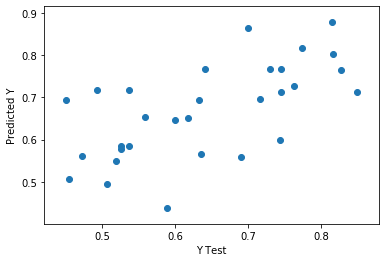

In [49]:
plt.scatter(y_test,predictions)
plt.xlabel('Y Test')
plt.ylabel('Predicted Y')

Yikes - this is not so great. More samples would have definitely helped.

Again, let's check out some typical metrics: MAE, MSE and RMSE.

In [41]:
print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

MAE: 0.08262396688288241
MSE: 0.010660243587139538
RMSE: 0.10324845561624416


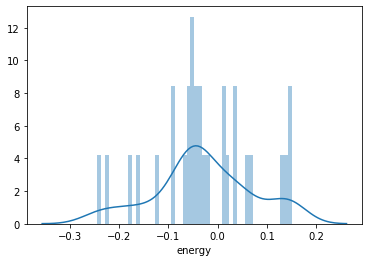

In [42]:
sns.distplot((y_test-predictions),bins=50);

In [53]:
coeffecients = pd.DataFrame(lm.coef_,X.columns)
coeffecients.columns = ['Coeffecient']
coeffecients

,Coeffecient
danceability,-4.196927e-01
loudness,2.698949e-02
speechiness,1.311348e-02
acousticness,-3.046890e-01
liveness,5.364709e-02
valence,1.613084e-01
tempo,1.136266e-04
duration_ms,1.060418e-08


Interpreting the coefficients:

1. Holding all other features fixed, a 1 unit increase in danceability is associated with an increase of -0.4196927 (i.e. a small decrease) in energy. That's odd.
2. A 1 unit increase in loudness is associated with an increase of 0.02698949 in energy. Makes sense.
3. A 1 unit increase in speechiness is associated with an increase of 0.01311348 in energy. This is surprising - I would expect a negative relationship.
4. A 1 unit increase in acousticness is associated with an increase of -0.3046890 in energy, so, again, acousticness "drains" energy!
5. A 1 unit increase in liveness is associated with an increase of 0.05364709 in energy. Makes sense.
6. A 1 unit increase in valence is associated with an increase of 0.1613084 in energy. Makes sense.
7. A 1 unit increase in tempo is associated with an increase of 0.0001136266 in energy. Makes sense.
8. A 1 unit increase in duration_ms is associated with an increase of 0.00000001060418 in energy, so essentially no relationship.